In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_columns=None

In [10]:
df = pd.read_csv('../datos/datos_da_ba.csv', index_col = 0)

In [11]:
df.head(3)

,age,gender,country,continent,job_title,work_activities,size_DA_dept,years_programming,first_language_rec,dev_language,...,BI_tools_Tableau,BI_tools_Thoughtspot,BI_tools_Google Data Studio,BI_tools_Looker,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau CRM,BI_tools_Domo,BI_tools_Alteryx,BI_tools_Sisense,BI_tools_Other
16,50-54,Man,Belgium,Europe,Data Analyst,Analyze and understand data to influence produ...,5-9,20+ years,Python,"Python, SQL",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,22-24,Nonbinary,United States of America,America,Data Analyst,NaN,3-4,< 1 years,R,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,30-34,Woman,Egypt,Africa,Data Analyst,Analyze and understand data to influence produ...,0,3-5 years,R,Python,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.isnull().sum()

age                        0
gender                     0
country                    0
continent                  0
job_title                  0
                        ... 
BI_tools_Tableau CRM    1568
BI_tools_Domo           1568
BI_tools_Alteryx        1568
BI_tools_Sisense        1568
BI_tools_Other          1568
Length: 127, dtype: int64

In [13]:
df['dev_language'].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript', nan,
       'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javascript', 'Python, S

In [14]:
df.columns

Index(['age', 'gender', 'country', 'continent', 'job_title', 'work_activities',
       'size_DA_dept', 'years_programming', 'first_language_rec',
       'dev_language',
       ...
       'BI_tools_Tableau', 'BI_tools_Thoughtspot',
       'BI_tools_Google Data Studio', 'BI_tools_Looker',
       'BI_tools_Microsoft Azure Synapse', 'BI_tools_Tableau CRM',
       'BI_tools_Domo', 'BI_tools_Alteryx', 'BI_tools_Sisense',
       'BI_tools_Other'],
      dtype='object', length=127)

In [15]:
for col in df.columns:
    print(col)

age
gender
country
continent
job_title
work_activities
size_DA_dept
years_programming
first_language_rec
dev_language
primary_data_tool
IDE
big_data
BI_tools
visualisation
ML
notebooks_KaggleNotebooks
notebooks_ColabNotebooks
notebooks_AzureNotebooks
notebooks_Paperspace/Gradient
notebooks_Binder/JupyterHub
notebooks_CodeOcean
notebooks_IBMWatsonStudio
notebooks_AmazonSagemakerStudioNotebooks
notebooks_AmazonEMRNotebooks
notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI)
notebooks_GoogleCloudDatalab
notebooks_DatabricksCollaborativeNotebooks
notebooks_Zeppelin/ZeplNotebooks
notebooks_DeepnoteNotebooks
notebooks_ObservableNotebooks
notebooks_None
notebooks_Other
sharing_PlotlyDash
sharing_Streamlit
sharing_NBViewer
sharing_GitHub
sharing_Personalblog
sharing_Kaggle
sharing_Colab
sharing_Shiny
sharing_does_not_share
sharing_Other
dev_language_C++
dev_language_Java
dev_language_MATLAB
dev_language_None
dev_language_C
dev_language_SQL
dev_language_Bash
dev_language_R
dev_language_Javascri

In [17]:
df_dev_languages = df.loc[:, 'dev_language_C++' : 'dev_language_Swift'].sum().reset_index()
df_dev_languages

,index,0
0,dev_language_C++,288.0
1,dev_language_Java,505.0
2,dev_language_MATLAB,230.0
3,dev_language_None,59.0
4,dev_language_C,388.0
5,dev_language_SQL,1866.0
6,dev_language_Bash,131.0
7,dev_language_R,928.0
8,dev_language_Javascript,327.0
9,dev_language_Python,2465.0


In [19]:
df_dev_languages.columns = ['dev_language', 'number_of_users']

df_dev_languages

,dev_language,number_of_users
0,dev_language_C++,288.0
1,dev_language_Java,505.0
2,dev_language_MATLAB,230.0
3,dev_language_None,59.0
4,dev_language_C,388.0
5,dev_language_SQL,1866.0
6,dev_language_Bash,131.0
7,dev_language_R,928.0
8,dev_language_Javascript,327.0
9,dev_language_Python,2465.0


AttributeError: 'Axes' object has no attribute 'set_xtickslabels'

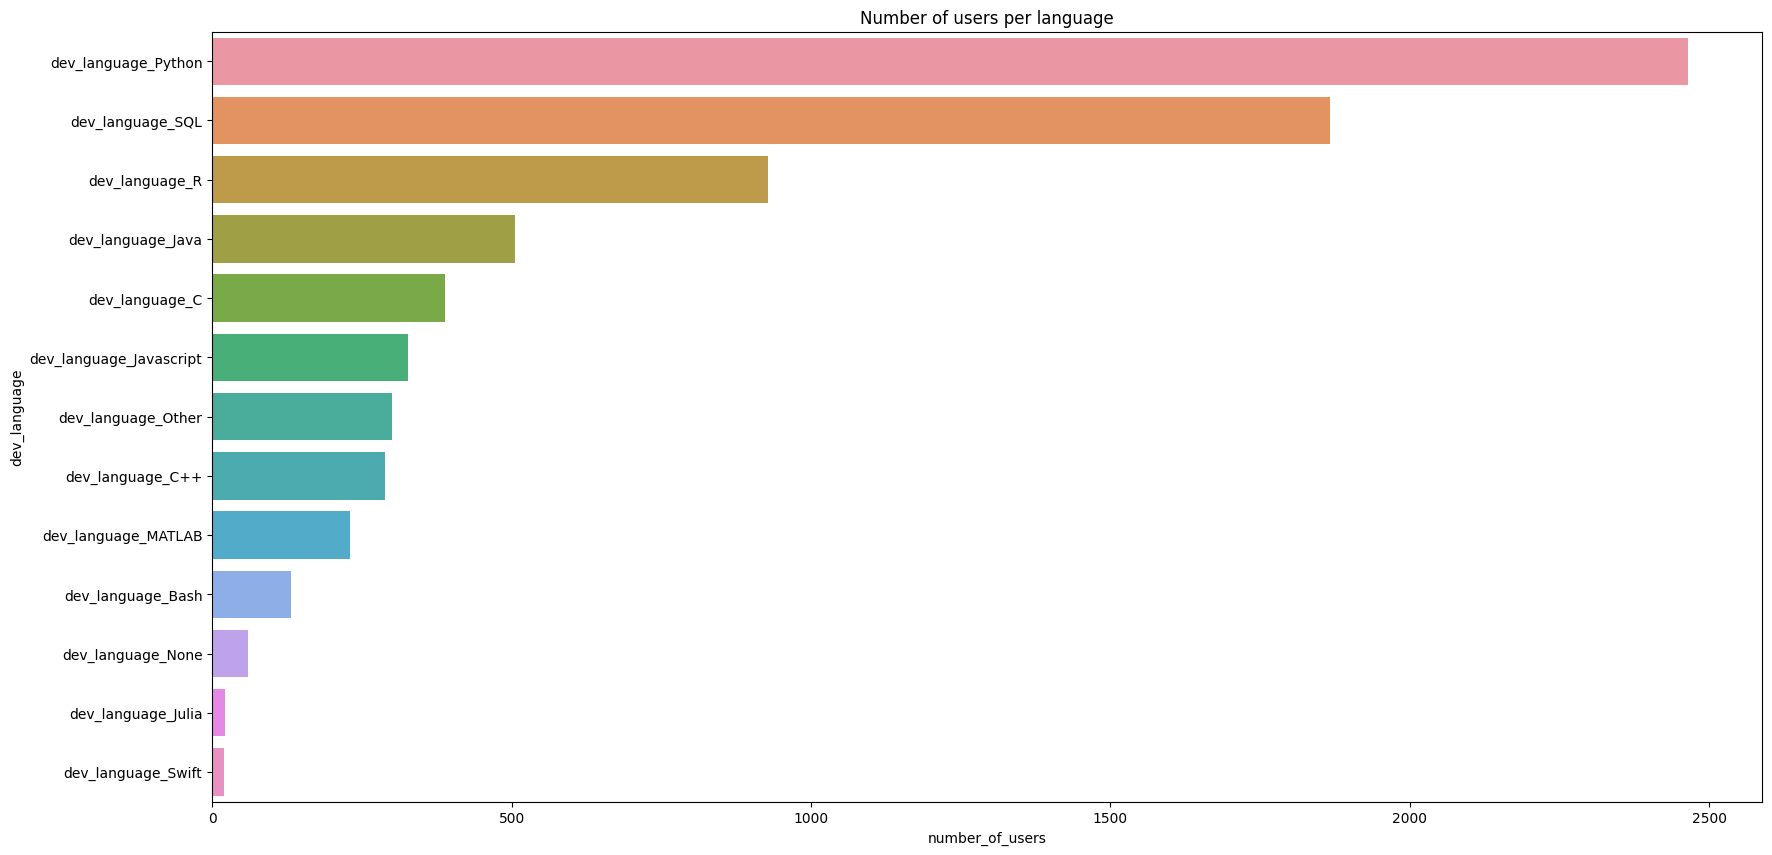

In [27]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='dev_language', x= 'number_of_users', data=df_dev_languages, order= df_dev_languages.sort_values('number_of_users', ascending= False)['dev_language'])


fig.set_title('Number of users per language') 

fig.set_xtickslabels(rotation= 45)


plt.show()